In [1]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import text, sequence
from keras import utils
from keras.regularizers import l1, l2
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [2]:
df1 = pd.read_csv("Clean lyrics.csv")
df1.head()

,lyrics_clean,tag
0,walking waters edgewhere i beforeif i find lov...,relax
1,first let say look tired rest head shut eyes e...,energetic
2,i know since i talked youbut maybe one makes w...,relax
3,can i hold one last time to fight feeling grow...,sad
4,when say dead amp gone yes i know wrong cut am...,sad


In [3]:
df = df1[df1['lyrics_clean'].notna()]
len(df)

17362

In [4]:
df = df.sample(frac=1).reset_index(drop=True)

In [5]:
df.isna().sum()

lyrics_clean    0
tag             0
dtype: int64

In [6]:
df['tag'].value_counts()

love         5458
party        1630
sad          1304
emotional    1274
happy        1123
grunge       1034
memory        904
religious     892
dark          765
relax         531
political     511
energetic     506
christmas     474
funny         468
freedom       286
halloween     121
rain           81
Name: tag, dtype: int64

In [7]:
df_love = df[df['tag'] == 'love']
df_party = df[df['tag'] == 'party']
df_energetic = df[df['tag'] == 'energetic']
df_sad = df[df['tag'] == 'sad']
df_emotional = df[df['tag'] == 'emotional']
df_relax = df[df['tag'] == 'relax']
df_memory = df[df['tag'] == 'memory']
df_grunge = df[df['tag'] == 'grunge']
df_happy = df[df['tag'] == 'happy']

In [8]:
df_love1, df_love2 = np.array_split(df_love, 2)
print(len(df_love), len(df_love1), len(df_love2))

5458 2729 2729


In [9]:
df_energy = pd.concat([df_party, df_energetic])
df_energy['tag'] = 'energy'
df_emotion = pd.concat([df_sad, df_emotional])
df_emotion['tag'] = 'emotion'
df_relaxing = pd.concat([df_relax, df_memory])
df_relaxing['tag'] = 'relaxing'
# df_joy = pd.concat([df_grunge, df_happy])
# df_joy['tag'] = 'joy'

In [11]:
df = pd.concat([df_love1, df_energy, df_emotion, df_relaxing, df_happy])
df

,lyrics_clean,tag
0,sat write letter promised id write today sudde...,love
4,on hills fire darkest houri dreaming true love...,love
6,good lovin keeps home together good lovin sure...,love
10,once i walked lonely road had one share love b...,love
14,honey honey honey open door this sweet daddy l...,love
...,...,...
17329,didnt say i would make mistake didnt say gonna...,happy
17337,i gotta go gotta go gotta go i something stupi...,happy
17339,true ring true ring gonna make crystal sing ot...,happy
17356,if i silent i real if i speak noone hear if i ...,happy


In [12]:
df = df.sample(frac=1).reset_index(drop=True)

In [13]:
print(len(df))
df['tag'].value_counts()

10001


love        2729
emotion     2578
energy      2136
relaxing    1435
happy       1123
Name: tag, dtype: int64

In [264]:
# unwanted_classes = ['rain', 'halloween', 'christmas', 'political', 'love', 'freedom', 'funny']

In [265]:
# df_impclass = df[~df['tag'].isin(unwanted_classes)]

In [266]:
# df3, df4 = np.array_split(df2, 2)

In [269]:
# df.to_csv("Clean_Lyrics(short).csv", index=False)

In [14]:
lyrics = df['lyrics_clean'].values.tolist()
sentences = [line.split() for line in lyrics]

In [ ]:
# Calculating Tf-Idf weights

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words=None)
tfidf = vectorizer.fit_transform(lyrics)

In [ ]:
feature_names = vectorizer.get_feature_names()
idf = vectorizer.idf_
tfidf_word = dict(zip(feature_names, idf))

In [ ]:
tfidf_word

In [12]:
# Pre trained word embeddings

import gensim

wv = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz", binary=True, limit=100000)
wv.init_sims(replace=True)

In [15]:
# Word2Vec embeddings 

import gensim
from gensim.models import Word2Vec
from gensim.models import FastText

# w2v_model = gensim.models.Word2Vec(sentences, min_count=5, size=100, window=7)

ft_model = FastText(sentences, size=50, window=3, min_count=7, sg=1)

In [16]:
ft_model.save('fasttext.model')

In [97]:
ft_model.most_similar('love')

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('lovelove', 0.9075329303741455),
 ('melove', 0.8517060875892639),
 ('lovemy', 0.8360820412635803),
 ('lovegive', 0.8258058428764343),
 ('lovewe', 0.8194286823272705),
 ('itlove', 0.8068496584892273),
 ('lovean', 0.8004063367843628),
 ('lovewith', 0.7995089292526245),
 ('loveive', 0.7955935597419739),
 ('loveoh', 0.7880630493164062)]

In [274]:
w2v_model.wv.most_similar('beauty')[:5]

[('treasure', 0.7866388559341431),
 ('beneath', 0.7559338212013245),
 ('cries', 0.7453146576881409),
 ('deepest', 0.73686683177948),
 ('rising', 0.732972264289856)]

In [107]:
wv.most_similar('beauty')

[('Beauty', 0.5802157521247864),
 ('beauties', 0.5709114670753479),
 ('beautiful', 0.5641546845436096),
 ('magnificence', 0.5614525675773621),
 ('splendor', 0.5473644137382507),
 ('elegance', 0.5227882862091064),
 ('gorgeous', 0.5182787775993347),
 ('skincare', 0.5133838653564453),
 ('serenity', 0.511922299861908),
 ('glamor', 0.5101828575134277)]

In [108]:
def sentence_vectorizer1(sentence):
    words = sentence.split()
    mean = np.mean([wv[word] for word in words if word in wv.vocab] or [np.zeros(300,)], axis=0)
    return mean

In [18]:
# Create sentence vector

def sentence_vectorizer2(sentence):
    words = sentence.split()
    mean = np.mean([ft_model[word] for word in words if word in ft_model.wv.vocab] or [np.zeros(50,)], axis=0)
    return mean

In [19]:
X = df.lyrics_clean
train_data = [sentence_vectorizer2(sentence) for sentence in X] 

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [20]:
y = df.tag

In [28]:
train_size = int(len(df) * .95)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(df) - train_size))

Train size: 9500
Test size: 501


In [29]:
x_train = train_data[:train_size]
train_tags = y[:train_size]

x_test = train_data[train_size:]
test_tags = y[train_size:]

In [30]:
encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

In [31]:
mapping = dict(zip(encoder.classes_, range(len(encoder.classes_))))
print(mapping)

{'emotion': 0, 'energy': 1, 'happy': 2, 'love': 3, 'relaxing': 4}


In [32]:
x_train = np.matrix(x_train)
x_test = np.matrix(x_test)
x_train.shape

(9500, 50)

In [33]:
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [34]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
print('number of classes:', num_classes)

x_train shape: (9500, 50)
x_test shape: (501, 50)
y_train shape: (9500, 5)
y_test shape: (501, 5)
number of classes: 5


In [94]:
# SMOTE Oversampling

from imblearn.over_sampling import SMOTE

smote = SMOTE('minority')
x_sm, y_sm = smote.fit_sample(x_train, y_train)
print(x_train.shape, y_train.shape, x_sm.shape, y_sm.shape)

(9931, 50) (9931, 5) (11102, 50) (11102, 5)


In [95]:
unique, counts = np.unique(y_sm, return_counts=True, axis=0)
print(counts)

[2445 2445 1957 1937 2318]


In [303]:
# Using class weights

from sklearn.utils import class_weight

y_integers = np.argmax(y_train, axis=1)
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_integers), y_integers)
weights = dict(enumerate(class_weights))

print(weights)

{0: 1.4983766233766234, 1: 0.9013671875, 2: 2.3132832080200503, 3: 1.0975029726516052, 4: 1.0109529025191675, 5: 0.42751273737841594, 6: 1.2837273991655076, 7: 0.70727969348659, 8: 2.1666666666666665, 9: 1.3148148148148149, 10: 0.8798856053384175}


In [38]:
batch_size = 16
epochs = 10

In [36]:
# Build the model

model = Sequential()
model.add(Dense(64, input_shape=(50,), activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense((num_classes), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                3264      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 325       
Total params: 7,749
Trainable params: 7,749
Non-trainable params: 0
_________________________________________________________________


In [39]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=100, verbose=1, callbacks=[es],
                    validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 7600 samples, validate on 1900 samples
Epoch 1/100
7600/7600 [==============================] - 3s 372us/step - loss: 1.5142 - acc: 0.3383 - val_loss: 1.4660 - val_acc: 0.3574
Epoch 2/100
7600/7600 [==============================] - 1s 95us/step - loss: 1.4590 - acc: 0.3884 - val_loss: 1.4301 - val_acc: 0.4189
Epoch 3/100
7600/7600 [==============================] - 1s 100us/step - loss: 1.4477 - acc: 0.3899 - val_loss: 1.4185 - val_acc: 0.4137
Epoch 4/100
7600/7600 [==============================] - 1s 98us/step - loss: 1.4393 - acc: 0.4009 - val_loss: 1.4154 - val_acc: 0.4216
Epoch 5/100
7600/7600 [==============================] - 1s 112us/step - loss: 1.4289 - acc: 0.4062 - val_loss: 1.4101 - val_acc: 0.4195
Epoch 6/100
7600/7600 [==============================] - 1s 107us/step - loss: 1.4218 - acc: 0.4100 - val_loss: 1.4140 - val_acc: 0.4184
Epoch 7/100
7600/7600 [===============

7600/7600 [==============================] - 1s 107us/step - loss: 1.2076 - acc: 0.5120 - val_loss: 1.4167 - val_acc: 0.4442
Epoch 00057: early stopping


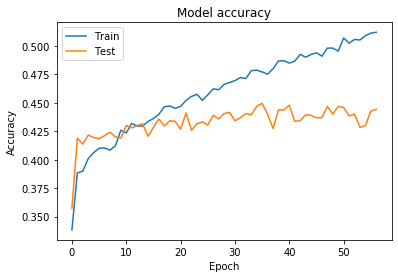

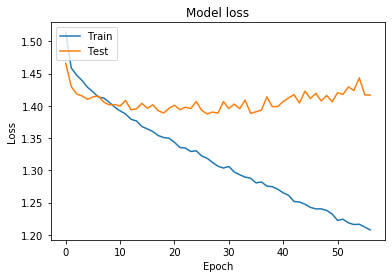

In [40]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [41]:
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
print('Test accuracy:', acc)

501/501 [==============================] - 0s 66us/step
Test accuracy: 0.44510978046886457


In [96]:
import pickle 

filename = 'model_sm.sav'
pickle.dump(model, open(filename, 'wb'))
print("Model saved to disk") 

loaded_model = pickle.load(open(filename, 'rb'))
print("Model loaded from disk")
score, acc = loaded_model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
print(acc)

Model saved to disk
Model loaded from disk
501/501 [==============================] - 0s 205us/step
0.44510978046886457


In [44]:
predictions = loaded_model.predict(x_test, batch_size=batch_size, verbose=1)
pred = loaded_model.predict_classes(x_test, batch_size=batch_size, verbose=1)

501/501 [==============================] - 0s 37us/step


In [45]:
labels = encoder.inverse_transform(pred)
unique, counts = np.unique(labels, return_counts=True)
count_dict = dict(zip(unique, counts))
print(count_dict)

{'emotion': 174, 'energy': 107, 'happy': 17, 'love': 174, 'relaxing': 29}


In [49]:
# multi_label = []

# for prediction in predictions:
#     new_labels = prediction.argsort()[-2:][::-1]
#     classes = encoder.inverse_transform(new_labels)
#     multi_label.append(classes)

# print(len(multi_label), multi_label[0])

In [50]:
test_data = pd.read_csv('Test lyrics.csv')
test_data.columns = [c.replace(' ', '_') for c in test_data.columns]
test_data.head()

,Artist,Song_Name,Lyrics,lyrics_without_stopwords,lyrics_clean
0,The Chainsmokers,Takeaway (with ILLENIUM & Lennon Stella),"Your heart for takeaway, yeah, yeah, yeah, yea...","Your heart takeaway, yeah, yeah, yeah, yeah, y...",your heart takeaway yeah yeah yeah yeah yeah y...
1,Zonderling,Lifetime,The first time I saw your face I wouldn't trad...,The first time I saw face I trade anything els...,the first time i saw face i trade anything els...
2,Bruno Martini,Somebody That You Loved,Lying here I pray that you're alone I'm tired ...,Lying I pray alone I'm tired sleeping I wish n...,lying i pray alone im tired sleeping i wish na...
3,JLV,Never Coming Down,I ain't no superman That don't mean I can't le...,"I ain't superman That mean I can't learn fly, ...",i aint superman that mean i cant learn fly no ...
4,Paige,Always On Your Mind,Life is like the waves Out in the ocean Someti...,"Life like waves Out ocean Sometimes, things cr...",life like waves out ocean sometimes things cra...


In [51]:
users_lyrics = test_data.lyrics_clean
test_lyrics = [sentence_vectorizer2(sentence) for sentence in users_lyrics]
test_lyrics = np.matrix(test_lyrics)
test_lyrics.shape

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


(66, 50)

In [53]:
predictions_user = loaded_model.predict(test_lyrics, batch_size=batch_size, verbose=1)
pred_user = loaded_model.predict_classes(test_lyrics, batch_size=batch_size, verbose=1)

66/66 [==============================] - 0s 108us/step


In [57]:
labels_user = encoder.inverse_transform(pred_user)
unique, counts = np.unique(labels_user, return_counts=True)
count_dict = dict(zip(unique, counts))
print(count_dict)

{'emotion': 19, 'energy': 9, 'happy': 3, 'love': 33, 'relaxing': 2}


In [240]:
# multi_label = []

# for prediction in predictions:
#     new_labels = prediction.argsort()[-2:][::-1]
#     classes = encoder.inverse_transform(new_labels)
#     multi_label.append(classes)

# print(len(multi_label), multi_label[0], multi_label[6])

66 ['grunge' 'sad'] ['sad' 'emotional']


In [58]:
column_names = ['Artist','Song_Name', 'Labels']
df = pd.DataFrame(list(zip(test_data.Artist, test_data.Song_Name, labels_user)), columns=column_names)

In [59]:
df.head(10)

,Artist,Song_Name,Labels
0,The Chainsmokers,Takeaway (with ILLENIUM & Lennon Stella),energy
1,Zonderling,Lifetime,emotion
2,Bruno Martini,Somebody That You Loved,love
3,JLV,Never Coming Down,happy
4,Paige,Always On Your Mind,emotion
5,ILLENIUM,In Your Arms (with X Ambassadors),emotion
6,Young Bombs,Loyal,emotion
7,Gryffin,Body Back (feat. Maia Wright) - Deniz Koyu Remix,love
8,Marshmello,Proud,love
9,ILLENIUM,Crashing (feat. Bahari),love


In [100]:
filename = 'encoder.sav'
pickle.dump(encoder, open(filename, 'wb'))

### Match closest label to input from Google Vision API

In [99]:
import gensim

w2v_API = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz", binary=True, limit=50000)
w2v_API.init_sims(replace=True)

In [104]:
filename = 'w2v_API.sav'
pickle.dump(w2v_API, open(filename, 'wb'))

In [68]:
listofwords = ['river', 'stream', 'water', 'flowing']
api_word = np.mean([w2v_API[word] for word in listofwords], axis=0)
api_word.shape

(300,)

In [89]:
api_classes = w2v_API.distances(api_word, other_words=('love', 'happy', 'energy', 'emotion', 'relaxing'))

In [91]:
tags = ['love', 'happy', 'energy', 'emotion', 'relaxing']
index = np.argmax(api_classes)

In [93]:
api_label = tags[index]
api_label

'happy'

In [101]:
output_songs = df[df['Labels'] == 'happy']

In [103]:
output_songs[:2]

,Artist,Song_Name,Labels
3,JLV,Never Coming Down,happy
17,West Coast Massive,Great Escape,happy


##  Word2Vec + CNN

In [ ]:
embeddings_index = {}
for w in w2v_model.wv.vocab.keys():
    embeddings_index[w] = w2v_model.wv[w]

print("Found %s word vectors." %len(embeddings_index))

In [ ]:
from sklearn.model_selection import train_test_split

X = df.lyrics_clean
y = df.tag
SEED = 1000
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(X, y, test_size=.1, random_state=SEED)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)

In [ ]:
print('Training set has %s entries' %len(x_train))
print('Validation set has %s entries' %len(x_validation))
print('Test set has %s entries' %len(x_test))

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)

In [ ]:
print(len(tokenizer.word_index))

In [ ]:
length = []
for x in x_train:
    length.append(len(x.split()))
    
print(max(length))

In [ ]:
x_train_seq = pad_sequences(sequences, maxlen=860)
print('Shape of data:', x_train_seq.shape)

In [ ]:
sequences_val = tokenizer.texts_to_sequences(x_validation)
x_val_seq = pad_sequences(sequences_val, maxlen=860)

In [ ]:
num_words = 10000
embedding_matrix = np.zeros((num_words, 100))
for word, i in tokenizer.word_index.items():
    if i >= num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
np.array_equal(embedding_matrix[183] ,embeddings_index.get('wait'))

In [ ]:
train_tags = y_train
val_tags = y_validation
test_tags = y_test

In [ ]:
encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_validation = encoder.transform(val_tags)
y_test = encoder.transform(test_tags)

In [ ]:
model_ptw2v = Sequential()
e = Embedding(10000, 100, weights=[embedding_matrix], input_length=860, trainable=False)
model_ptw2v.add(e)
model_ptw2v.add(Flatten())
model_ptw2v.add(Dense(64, activation='relu'))
model.add(Dense((num_classes), activation='softmax'))

model_ptw2v.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_ptw2v.summary()

In [ ]:
history = model_ptw2v.fit(x_train_seq, y_train, validation_data=(x_val_seq, y_validation), epochs=5, batch_size=32, verbose=1)